# run chloride - input from class

In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from helper_func import *
from chloride import Chloride_Model, load_df_D_RCM, C_crit_param, C_eqv_to_C_S_0
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# global
class Wrapper: pass

pars_raw = Wrapper()

pars_raw.marine = False

# 1)marine or coastal
pars_raw.C_0_M = 18.980 # natural chloirde content of sea water [g/l] https://www.lenntech.com/composition-seawater.htm
  
# 2) de icing salt (hard to quantify)
pars_raw.C_0_R = 0  # average chloride content of the chloride contaminated water [g/l]
pars_raw.n = 0      # average number of salting events per year [-]
pars_raw.C_R_i = 0  # average amount of chloride spread within one spreading event [g/m2]
pars_raw.h_S_i = 1  # amount of water from rain and melted snow per spreading period [l/m2]

pars_raw.C_eqv_to_C_S_0 = C_eqv_to_C_S_0

pars_raw.exposure_condition = 'splash'
pars_raw.exposure_condition_geom_sensitive = True
pars_raw.T_real = 273 + 25

pars_raw.x_a = 10.
pars_raw.x_h = 10.
pars_raw.D_RCM_test = 'N/A'
pars_raw.concrete_type = 'Portland cement concrete'
pars_raw.cement_concrete_ratio = 300./2400.
pars_raw.C_max_user_input = None
pars_raw.C_max_option = 'empirical'
pars_raw.C_0 = 0
pars_raw.C_crit_distrib_param = C_crit_param()

pars_raw.option = Wrapper()
pars_raw.option.choose = True
pars_raw.option.cement_type = 'CEM_I_42.5_R+SF'
pars_raw.option.wc_eqv = 0.4
pars_raw.option.df_D_RCM_0 = load_df_D_RCM()

/Users/gangli/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Pf(g = R-S < 0) from various methods
    sample count: 0.52526
    g integral: 0.5277346841125513
    R S integral: 0.5278378135382679
    beta_factor: -0.3116849723925781


<IPython.core.display.Javascript object>


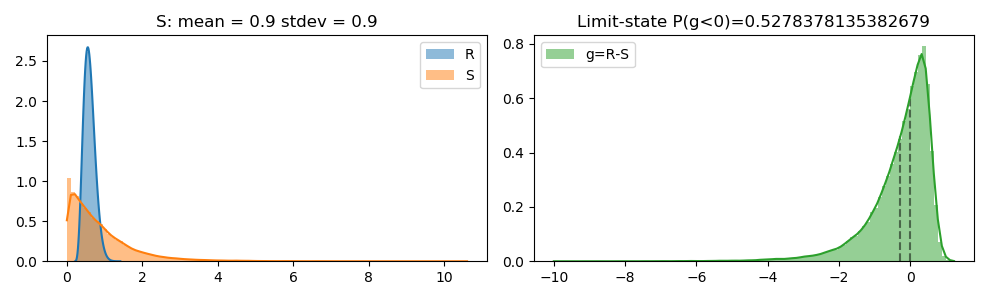

In [3]:
# run model
M = Chloride_Model(pars_raw)
M.run(x = 40, t = 10)
M.postproc(plot=True)

2.89306640625e-13
1.004150390625e-12


/Users/gangli/Local Documents/Mitacs project local/Tinkrete/chloride.py:61: RuntimeWarning: invalid value encountered in sqrt
  1 - erf((x - pars.dx) / (2 * (pars.D_app * t) ** 0.5))


2.5700683593749997e-12


<IPython.core.display.Javascript object>


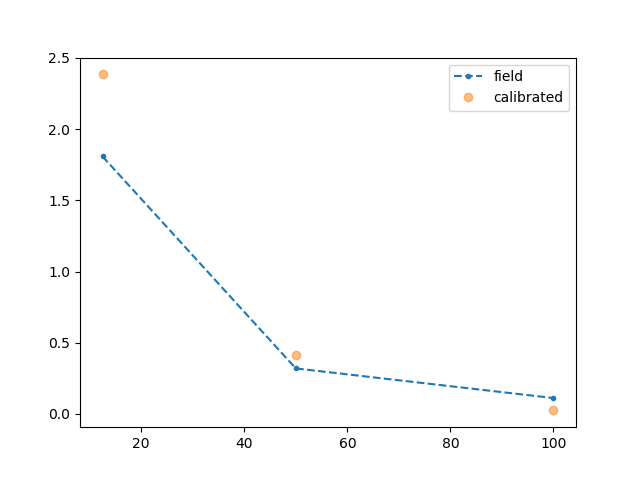

In [7]:
# Calibration
chloride_content_field = pd.DataFrame()
chloride_content_field['depth'] = [12.5, 50, 100]  # [mm]
chloride_content_field['cl'] = np.array([0.226, 0.04, 0.014]) / pars_raw.cement_concrete_ratio  # chloride_content[wt.-%/cement]
M_cal = M.calibrate(40, chloride_content_field,print_proc=False) 

Pf(g = R-S < 0) from various methods
    sample count: 0.23286
    g integral: 0.23450308021409505
    R S integral: 0.23384484496457436
    beta_factor: 0.3406893198091773


<IPython.core.display.Javascript object>


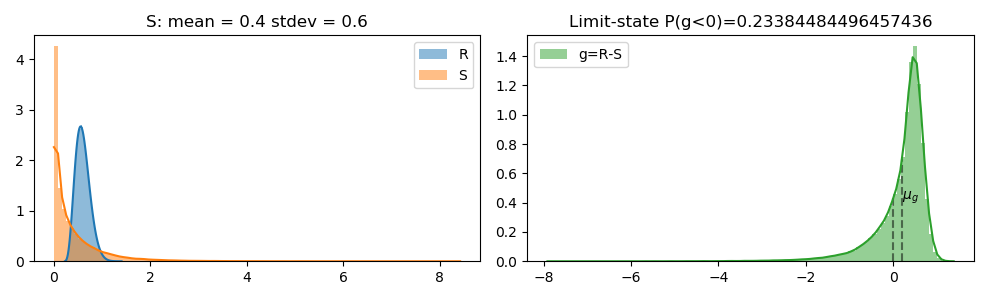

In [8]:
M_cal.run(x = 50.8, t = 40)
M_cal.postproc(plot=True)

In [23]:
# plt.savefig('chloride_at_rebar_40year.pdf',dpi=600)

# chloride with year 
+ now available from chloride.py module

/Users/gangli/Local Documents/Mitacs project local/Tinkrete/helper_func.py:394: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lambda x: R_distrib.cdf(x) * S_kde_fit(x)[0], 0, S_dropna.max()


<IPython.core.display.Javascript object>


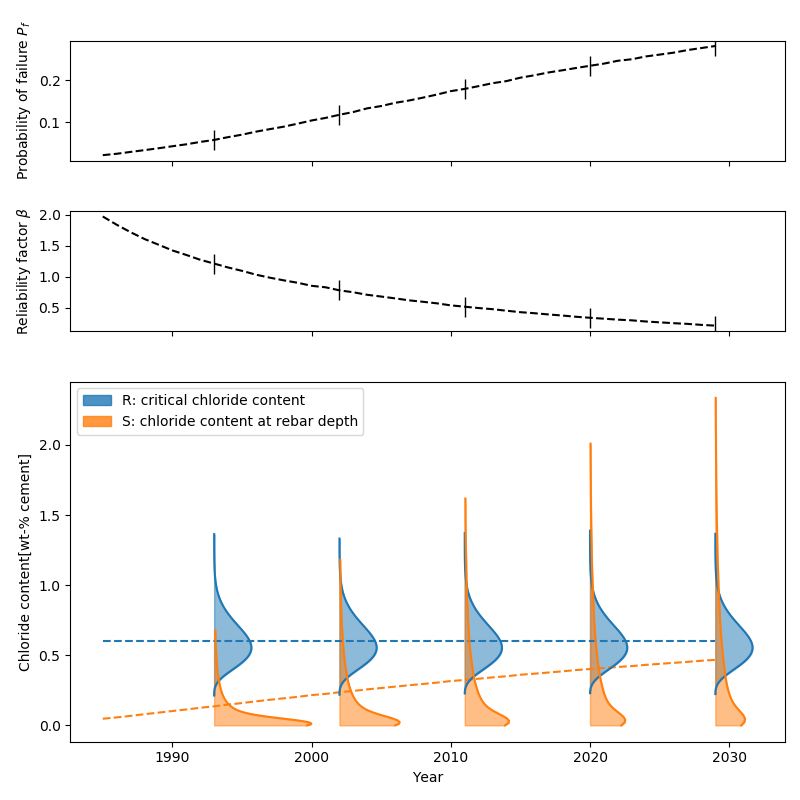

In [15]:
t_lis = np.arange(5,50,1)
x_bar = 50.8
pf_cl, beta_cl = M_cal.chloride_with_year(x_bar,t_lis,amplify=1)

In [22]:
# change label ticks
ax = plt.gca()
labels = np.array([int(item.get_text()) for item in ax.get_xticklabels()])+1980
ax.set_xticklabels(labels)
ax.set_xlabel('Year')
# plt.gcf().savefig('RS_time_chloride.pdf',dpi=600)



[Text(0.0, 0, '1980'),
 Text(10.0, 0, '1990'),
 Text(20.0, 0, '2000'),
 Text(30.0, 0, '2010'),
 Text(40.0, 0, '2020'),
 Text(50.0, 0, '2030'),
 Text(60.0, 0, '2040')]

Text(0.5, 29.000000000000135, 'Year')